# Импорты, создание датафреймов

In [ ]:
#Install Kagle 
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
#Kagle connect
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
#Download from Kagle
!kaggle competitions download -c champs-scalar-coupling -p kaggle/

 99% 374M/377M [00:03<00:00, 53.2MB/s]
100% 377M/377M [00:03<00:00, 99.0MB/s]


In [ ]:
%%capture
# хорошая команда, скрывает аутпут.
!unzip kaggle/champs-scalar-coupling.zip -d kaggle/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://drive.google.com/file/d/1eLQEG8gSmd961qD43cisUTGjAaxCxV19/view?usp=sharing  Molecules_data.zip
# https://drive.google.com/file/d/1TePC-54op7w_t69jERTTs5MUj4yNZOat/view?usp=sharing  test_path.csv
# https://drive.google.com/file/d/1JzY1TIRnbSAMXT3cuRExZjifwZCx5pqv/view?usp=sharing  train_path.csv

import subprocess


def download_file_from_gdrive(gdrive_file_id: str, outfile: str) -> None:
    """ Скачивает файл из Google Drive по ID """

    upload_cmd = (
        "wget --load-cookies /tmp/cookies.txt"
        " \"https://docs.google.com/uc?export=download&confirm=$("
        " wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies"
        " --no-check-certificate 'https://docs.google.com/uc?export=download"
        f"&id={gdrive_file_id}'"
        " -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\\1\\n/p')"
        f"&id={gdrive_file_id}\" "
        f" -O {outfile} && rm -rf /tmp/cookies.txt"
    )
    subprocess.check_call(upload_cmd, shell=True)

download_file_from_gdrive('1eLQEG8gSmd961qD43cisUTGjAaxCxV19', 'Molecules_data.zip')
download_file_from_gdrive('1TePC-54op7w_t69jERTTs5MUj4yNZOat', 'test_path.csv')
download_file_from_gdrive('1JzY1TIRnbSAMXT3cuRExZjifwZCx5pqv', 'train_path.csv')

In [ ]:
!unzip -j Molecules_data.zip

Archive:  Molecules_data.zip
 extracting: dipole_moments.csv      
 extracting: magnetic_shielding_tensors.csv  
 extracting: mulliken_charges.csv    
 extracting: potential_energy.csv    
 extracting: sample_submission.csv   
 extracting: scalar_coupling_contributions.csv  
 extracting: structures.csv          
 extracting: structures.zip          
 extracting: test.csv                
 extracting: train.csv               


In [ ]:
%%capture
!unzip structures.zip -d structures/

In [ ]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)
# этих данных всё равно нет для test, только если графики порисовать какие-то
# df_dipole_moments = pd.read_csv('dipole_moments.csv')
# df_magnetic_shielding_tensors = pd.read_csv('magnetic_shielding_tensors.csv')
# df_mulliken_charges = pd.read_csv('mulliken_charges.csv')
# df_potential_energy = pd.read_csv('potential_energy.csv')
# df_scalar_coupling_contributions = pd.read_csv('scalar_coupling_contributions.csv')
df_structures = pd.read_csv('structures.csv')
train_path = pd.read_csv('train_path.csv', index_col=0) # посчитаны долгие фичи
test_path = pd.read_csv('test_path.csv', index_col=0) # посчитаны долгие фичи

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
# df_train.shape, df_test.shape, df_dipole_moments.shape, df_magnetic_shielding_tensors.shape, df_mulliken_charges.shape, df_potential_energy.shape, df_scalar_coupling_contributions.shape, df_structures.shape, train_path.shape, test_path.shape

Min Value of Target : -36.2186
Max Value of Target : 204.88


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


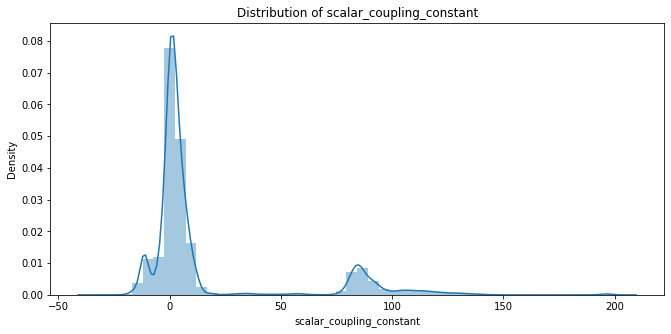

In [ ]:
#Гланем на распределение "таргета"
print('Min Value of Target : {}'.format(df_train['scalar_coupling_constant'].min()))
print('Max Value of Target : {}'.format(df_train['scalar_coupling_constant'].max()))

plt.figure(figsize=(11, 5))
sns.distplot(df_train['scalar_coupling_constant'])
plt.title('Distribution of scalar_coupling_constant')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

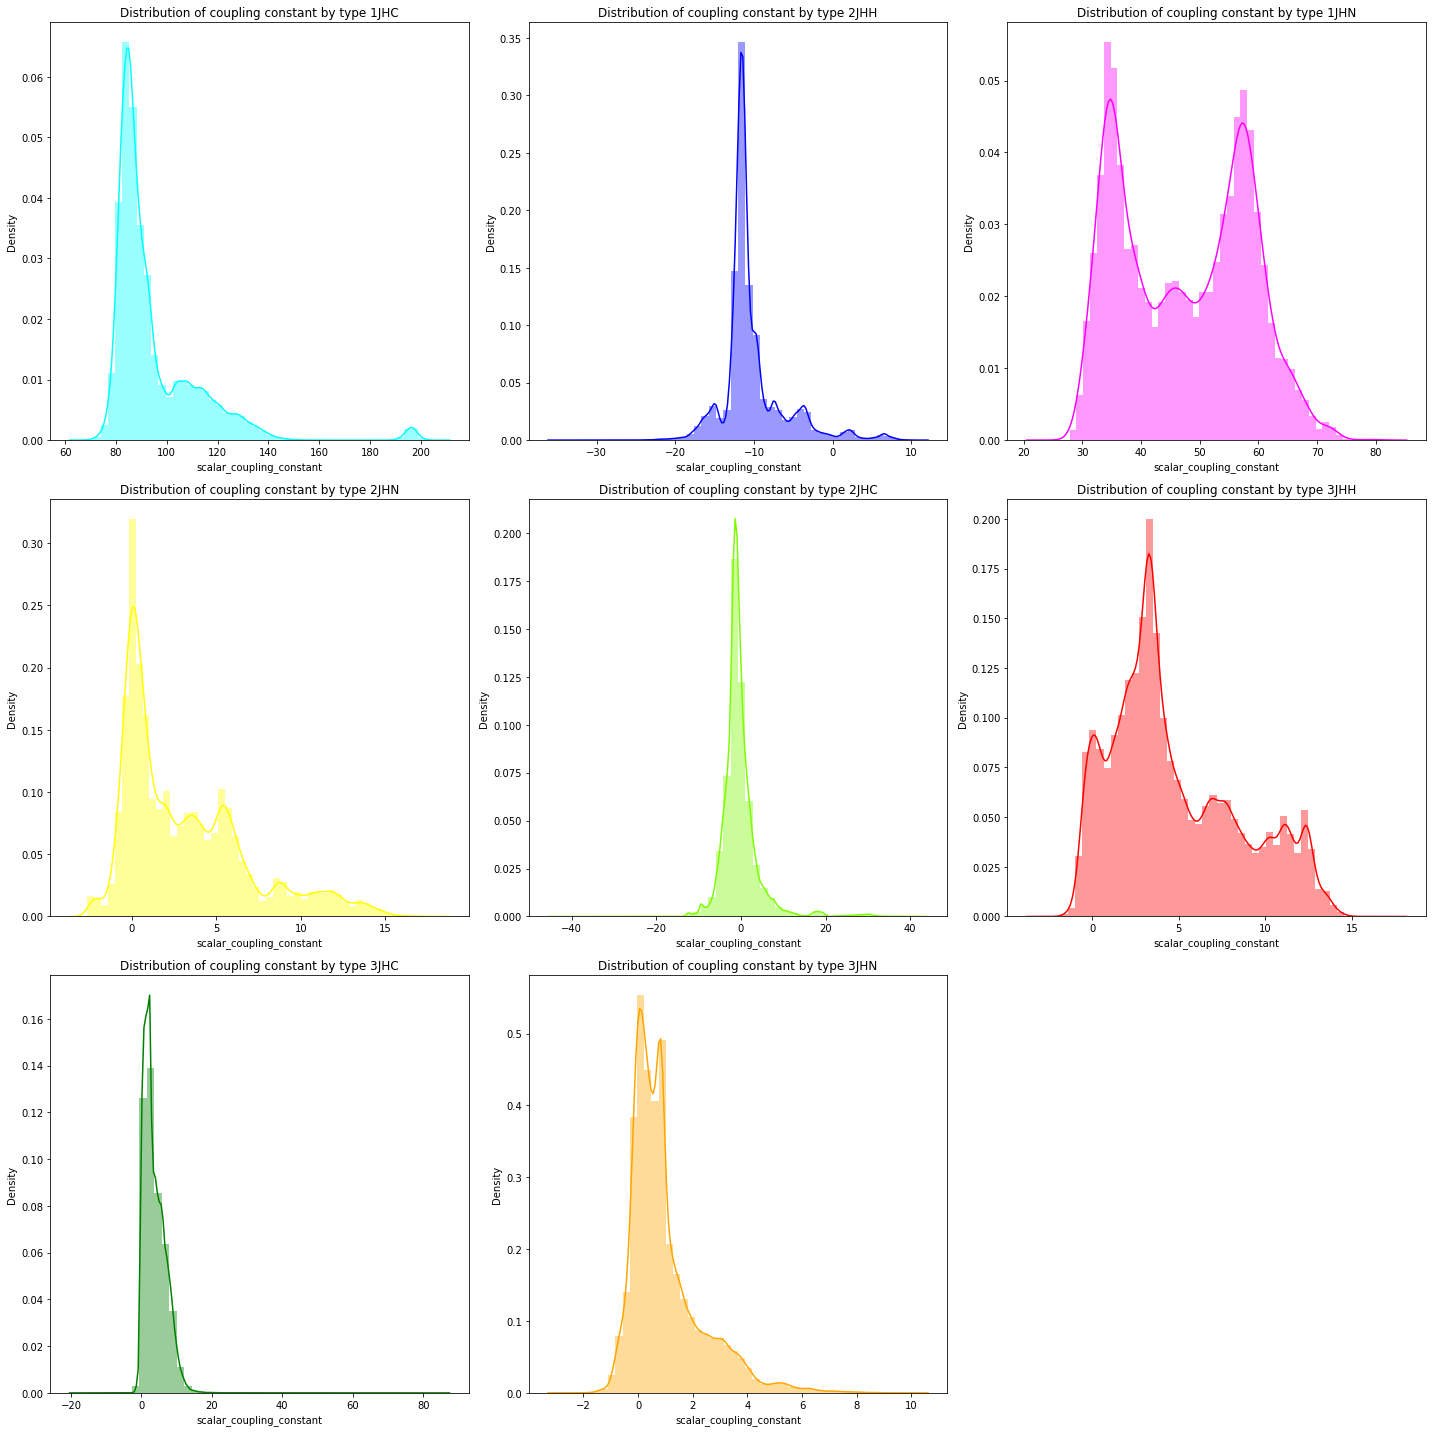

In [ ]:
#Посмотрим как распределены значения по типам связей в обучающей выборке
colors = ['cyan', 'blue', 'magenta', 'yellow', 'lawngreen', 'red', 'green', 'orange']
plt.figure(figsize=(20, 20))
for i, t in enumerate(df_train['type'].unique()):
    plt.subplot(3,3, i+1)
    sns.distplot(df_train[df_train['type'] == t]['scalar_coupling_constant'], color = colors[i])
    #plt.title('Distribution of coupling constant by type '+ t)
    plt.tight_layout()
plt.show()

# Подготовка датесета

## Объявим процедуры для создания датасета

In [ ]:
# Декоратор для отображения прогресса изменения датасета
def PrintChangings(foo):
  def warapper(*args):
    tr = args[0]
    ts = args[1]
    f_name = foo.__name__ 
    print('--------------BEFORE MERGING IN {}-------------------------'.format(f_name))
    print('Train set len:',len(tr.index), 'columns:', len(tr.columns))
    print('Test set len:',len(ts.index), 'columns:', len(ts.columns))
    tr, ts = foo(*args) # Сама функция
    print('--------------AFTER MERGING IN {}-------------------------'.format(f_name))
    print('Train set len:',len(tr.index), 'columns:', len(tr.columns))
    print('Test set len:',len(ts.index), 'columns:', len(ts.columns))
    return tr, ts
  return warapper

### Объединяем данные с dipole moments

In [ ]:
# Объединяем данные с dipole moments

@PrintChangings
def MergeTrainTestWithDipoleMoments(train, test, dipole_moments):
  train = pd.merge(train.assign(x=train.molecule_name.astype(str)), dipole_moments.assign(x=dipole_moments.molecule_name.astype(str)),how='inner', on='x', suffixes=("_train", '_dipole_moments'))
  train.drop(['x','molecule_name_dipole_moments'], axis=1, inplace= True)
  train.rename(columns={"molecule_name_train": "molecule_name"}, inplace = True)
  train.rename(columns={"X": "X_dm","Y": "Y_dm","Z": "Z_dm"}, inplace = True)

  test = pd.merge(test.assign(x=test.molecule_name.astype(str)), dipole_moments.assign(x=dipole_moments.molecule_name.astype(str)),how='inner', on='x', suffixes=("_test", '_dipole_moments'))
  test.drop(['x','molecule_name_dipole_moments'], axis=1, inplace= True)
  test.rename(columns={"molecule_name_test": "molecule_name"}, inplace = True)
  test.rename(columns={"X": "X_dm","Y": "Y_dm","Z": "Z_dm"}, inplace = True)
  
  del dipole_moments
  return train, test

### Объединяем данные с magnetic shielding tensors

In [ ]:
@PrintChangings
def MergeTrainTestWithMagneticShielding(train, test, magnetic_shielding):
  train = pd.merge(train, magnetic_shielding, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_magnetic_shielding'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"XX":"XX_ms_atom0", "YX":"YX_ms_atom0",	"ZX":"ZX_ms_atom0",	"XY":"XY_ms_atom0",	"YY":"YY_ms_atom0",	"ZY":"ZY_ms_atom0",	"XZ":"XZ_ms_atom0",	"YZ":"YZ_ms_atom0",	"ZZ":"ZZ_ms_atom0"}, inplace = True)

  train = pd.merge(train, magnetic_shielding, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_magnetic_shielding'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"XX":"XX_ms_atom1", "YX":"YX_ms_atom1",	"ZX":"ZX_ms_atom1",	"XY":"XY_ms_atom1",	"YY":"YY_ms_atom1",	"ZY":"ZY_ms_atom1",	"XZ":"XZ_ms_atom1",	"YZ":"YZ_ms_atom1",	"ZZ":"ZZ_ms_atom1"}, inplace = True)


  test = pd.merge(test, magnetic_shielding, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_magnetic_shielding'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"XX":"XX_ms_atom0", "YX":"YX_ms_atom0",	"ZX":"ZX_ms_atom0",	"XY":"XY_ms_atom0",	"YY":"YY_ms_atom0",	"ZY":"ZY_ms_atom0",	"XZ":"XZ_ms_atom0",	"YZ":"YZ_ms_atom0",	"ZZ":"ZZ_ms_atom0"}, inplace = True)

  test = pd.merge(test, magnetic_shielding, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_magnetic_shielding'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"XX":"XX_ms_atom1", "YX":"YX_ms_atom1",	"ZX":"ZX_ms_atom1",	"XY":"XY_ms_atom1",	"YY":"YY_ms_atom1",	"ZY":"ZY_ms_atom1",	"XZ":"XZ_ms_atom1",	"YZ":"YZ_ms_atom1",	"ZZ":"ZZ_ms_atom1"}, inplace = True)

  del magnetic_shielding
  return train, test

### Объединяем данные с mulliken charges

In [ ]:
@PrintChangings
def MergeTrainTestWithMullikenCharges(train, test, mulliken_charges):
  train = pd.merge(train, mulliken_charges, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_mulliken_charges'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"mulliken_charge": "mcharge_atom0"}, inplace = True)

  test = pd.merge(test, mulliken_charges, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_mulliken_charges'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"mulliken_charge": "mcharge_atom0"}, inplace = True)


  train = pd.merge(train, mulliken_charges, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_mulliken_charges'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"mulliken_charge": "mcharge_atom1"}, inplace = True)

  test = pd.merge(test, mulliken_charges, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_mulliken_charges'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"mulliken_charge": "mcharge_atom1"}, inplace = True)

  del mulliken_charges
  return train, test

### Объединяем данные с potential_energy

In [ ]:
@PrintChangings
def MergeTrainTestWithPotentialEnergy(train, test, potential_energy):
  train = pd.merge(train.assign(x=train.molecule_name.astype(str)), potential_energy.assign(x=potential_energy.molecule_name.astype(str)),how='inner', on='x', suffixes=("_train", '_potential_energy'))
  train.drop(['x','molecule_name_potential_energy'], axis=1, inplace= True)
  train.rename(columns={"molecule_name_train": "molecule_name"}, inplace = True)

  test = pd.merge(test.assign(x=test.molecule_name.astype(str)), potential_energy.assign(x=potential_energy.molecule_name.astype(str)),how='inner', on='x', suffixes=("_test", '_potential_energy'))
  test.drop(['x','molecule_name_potential_energy'], axis=1, inplace= True)
  test.rename(columns={"molecule_name_test": "molecule_name"}, inplace = True)

  del potential_energy
  return train, test

### Объединяем данные с structures

In [ ]:
def MergeTrainTestWithStructures(train, test, structures):
  train = pd.merge(train, structures, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_structures'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"atom":"atom0", "x":"struct_x_atom0", "y":"struct_y_atom0", "z":"struct_z_atom0"}, inplace = True)

  test = pd.merge(test, structures, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_structures'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"atom":"atom0", "x":"struct_x_atom0", "y":"struct_y_atom0", "z":"struct_z_atom0"}, inplace = True)

  train = pd.merge(train, structures, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_train", '_structures'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"atom":"atom1", "x":"struct_x_atom1", "y":"struct_y_atom1", "z":"struct_z_atom1"}, inplace = True)

  test = pd.merge(test, structures, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner',suffixes=("_test", '_structures'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"atom":"atom1", "x":"struct_x_atom1", "y":"struct_y_atom1", "z":"struct_z_atom1"}, inplace = True)

  del structures
  return train, test

### Добавим расстояния между атомами связи

In [ ]:
@PrintChangings
def AddDistanceBetweenAtomsinCoupling(train, test):
  train['struct_dist'] = ((train['struct_x_atom1'] - train['struct_x_atom0'])**2 + (train['struct_y_atom1'] - train['struct_y_atom0'])**2 + (train['struct_z_atom1'] - train['struct_z_atom0'])**2)** (0.5)
  test['struct_dist'] = ((test['struct_x_atom1'] - test['struct_x_atom0'])**2 + (test['struct_y_atom1'] - test['struct_y_atom0'])**2 + (test['struct_z_atom1'] - test['struct_z_atom0'])**2)** (0.5)
  return train, test

### Добавим общее количество связей в молекуле

In [ ]:
@PrintChangings
def FullCountCouplingsPerMolekula(train, test):
  cnt = train.groupby(['molecule_name']).size().reset_index(name='CouplingCnt')
  train = pd.merge(train.assign(x=train.molecule_name.astype(str)), cnt.assign(x=cnt.molecule_name.astype(str)),how='inner', on='x', suffixes=("_train", '_coupling_cnt'))
  train.drop(['x','molecule_name_coupling_cnt'], axis=1, inplace= True)
  train.rename(columns={"molecule_name_train": "molecule_name"}, inplace = True)

  cnt = test.groupby(['molecule_name']).size().reset_index(name='CouplingCnt')
  test = pd.merge(test.assign(x=test.molecule_name.astype(str)), cnt.assign(x=cnt.molecule_name.astype(str)),how='inner', on='x', suffixes=("_test", '_coupling_cnt'))
  test.drop(['x','molecule_name_coupling_cnt'], axis=1, inplace= True)
  test.rename(columns={"molecule_name_test": "molecule_name"}, inplace = True)

  del cnt
  return train, test

### Добавим общее количество связей у одного атома в одной конкретной молекуле

In [ ]:
@PrintChangings
def FullCountCouplingsPerMolekulaAtom(train, test):
  cnt1 = train.groupby(['molecule_name','atom_index_0']).size().reset_index(name='coupling_cnt')
  cnt1.rename(columns={"atom_index_0": "atom_index"}, inplace = True)
  cnt2 = train.groupby(['molecule_name','atom_index_1']).size().reset_index(name='coupling_cnt')
  cnt2.rename(columns={"atom_index_1": "atom_index"}, inplace = True)
  mid_df = pd.concat([cnt1, cnt2])
  cnt = mid_df.groupby(['molecule_name','atom_index'], as_index=False)['coupling_cnt'].sum()


  train = pd.merge(train, cnt, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner', suffixes=("_train", '_coupling_cnt'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"coupling_cnt": "atom0_coupling_cnt"}, inplace = True)
  train = pd.merge(train, cnt, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner', suffixes=("_train", '_coupling_cnt'))
  train.drop(['atom_index'], axis=1, inplace= True)
  train.rename(columns={"coupling_cnt": "atom1_coupling_cnt"}, inplace = True)

  cnt1 = test.groupby(['molecule_name','atom_index_0']).size().reset_index(name='coupling_cnt')
  cnt1.rename(columns={"atom_index_0": "atom_index"}, inplace = True)
  cnt2 = test.groupby(['molecule_name','atom_index_1']).size().reset_index(name='coupling_cnt')
  cnt2.rename(columns={"atom_index_1": "atom_index"}, inplace = True)
  mid_df = pd.concat([cnt1, cnt2])
  cnt = mid_df.groupby(['molecule_name','atom_index'], as_index=False)['coupling_cnt'].sum()

  test = pd.merge(test, cnt, left_on=['molecule_name','atom_index_0'], right_on = ['molecule_name','atom_index'],how='inner', suffixes=("_test", '_coupling_cnt'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"coupling_cnt": "atom0_coupling_cnt"}, inplace = True)
  test = pd.merge(test, cnt, left_on=['molecule_name','atom_index_1'], right_on = ['molecule_name','atom_index'],how='inner', suffixes=("_test", '_coupling_cnt'))
  test.drop(['atom_index'], axis=1, inplace= True)
  test.rename(columns={"coupling_cnt": "atom1_coupling_cnt"}, inplace = True)

  del cnt
  return train, test

### Запустим общую обработку тут

In [ ]:
df_train, df_test = MergeTrainTestWithDipoleMoments(df_train,df_test,df_dipole_moments)
del df_dipole_moments
df_train, df_test = MergeTrainTestWithMagneticShielding(df_train,df_test,df_magnetic_shielding_tensors)
del df_magnetic_shielding_tensors
df_train, df_test = MergeTrainTestWithMullikenCharges(df_train,df_test,df_mulliken_charges)
del df_mulliken_charges
df_train, df_test = MergeTrainTestWithPotentialEnergy(df_train,df_test,df_potential_energy)
del df_potential_energy
df_train, df_test = MergeTrainTestWithStructures(df_train,df_test,df_structures)
del df_structures
df_train, df_test = AddDistanceBetweenAtomsinCoupling(df_train, df_test)
df_train, df_test = FullCountCouplingsPerMolekula(df_train,df_test)
df_train, df_test = FullCountCouplingsPerMolekulaAtom(df_train,df_test)

### Объявим категориальные фичи тут

In [ ]:
# df_test['molecule_name'] = df_test['molecule_name'].astype('|S')
# df_test['atom0'] = df_test['atom0'].astype('|S')
# df_test['atom1'] = df_test['atom1'].astype('|S')
# df_test['type'] = df_test['type'].astype('|S')

# df_train['molecule_name'] = df_train['molecule_name'].astype('|S')
# df_train['atom0'] = df_train['atom0'].astype('|S')
# df_train['atom1'] = df_train['atom1'].astype('|S')
# df_train['type'] = df_train['type'].astype('|S')

cat_features = ['type', 'atom0', 'atom1', 'molecule_name']

### Подготовим тестовыю и трейновую выборки к обычению

In [ ]:
train_X = df_train.drop(["id", "scalar_coupling_constant"], axis=1)
train_y = df_train["scalar_coupling_constant"]
test_X = df_test.drop(["id"] , axis=1)

In [ ]:
# print(df_magnetic_shielding_tensors.info())
# df_structures

In [ ]:
# df_structures.nunique()
# df_scalar_coupling_contributions.isna().sum()

#Глянем на то, какие данные предоставлены в соревновании:

##MAIN DATA

### `train.csv` 4 659 076 rows × 6 columns

the training set, where the first column (molecule_name) is the name of the molecule where the coupling constant originates (the corresponding XYZ file is located at ./structures/.xyz), the second (atom_index_0) and third column (atom_index_1) is the atom indices of the atom-pair creating the coupling and the fourth column (scalar_coupling_constant) is the scalar coupling constant that we want to be able to predict

`id`:int64 все значения уникальны

`molecule_name`:str 85012 уникальных значений

`atom_index_0`:int64 28 уникальных значений

`atom_index_1`:int64 29 уникальных значений

`type`:str 8 уникальных значений

`scalar_coupling_constant`:float64 таргет

### `test.csv` 2 505 190 rows x 5 columns

the test set; same info as train, without the target variable

`id`:int64 все значения уникальны

`molecule_name`:str 85012 уникальных значений

`atom_index_0`:int64 29(!) уникальных значений

`atom_index_1`:int64 29 уникальных значений

`type`:str 8 уникальных значений

### `structures` 2 358 875 rows × 6 columns

containing molecular structure (xyz) info, where the third column contains the atomic element (H for hydrogen, C for carbon etc.) and the remaining columns contain the X, Y and Z cartesian coordinates (a standard format for chemists and molecular visualization programs)

`molecule_name`:str 130789 уникальных значений

`atom_index`:int64 29 уникальных значений

`atom`:str 5 уникальных значений

`x`:float64 2358802 уникальных значений

`y`:float64 2358808 уникальных значений

`z`:float64 2358792 уникальных значений

## Additional data(есть только для сета train)

### `dipole_moments.csv` 130 789 rows × 4 columns

contains the molecular electric dipole moments. These are three dimensional vectors that indicate the charge distribution in the molecule. The first column (molecule_name) are the names of the molecule, the second to fourth column are the X, Y and Z components respectively of the dipole moment.

`molecule_name`:str 130789 уникальных значений, мёрджится с аналогичным столбцом в train.csv

`X`:float64 66423 уникальных значений

`Y`:float64 57652 уникальных значений

`Z`:float64 41028 уникальных значений

### `magnetic_shielding_tensors.csv` 2 358 875 rows × 11 columns, все фичи, кроме molecule_name и atom_index, float64

contains the magnetic shielding tensors for all atoms in the molecules. The first column (molecule_name) contains the molecule name, the second column (atom_index) contains the index of the atom in the molecule, the third to eleventh columns contain the XX, YX, ZX, XY, YY, ZY, XZ, YZ and ZZ elements of the tensor/matrix respectively.

`molecule_name`:str 130789 уникальных значений, мёрджится с аналогичным столбцом в train.csv

`atom_index`:int64 29 уникальных значений

`XX	YX	ZX	XY	YY	ZY	XZ	YZ	ZZ`:float64

### `mulliken_charges.csv` 2 358 875 rows × 3 columns

contains the mulliken charges for all atoms in the molecules. The first column (molecule_name) contains the name of the molecule, the second column (atom_index) contains the index of the atom in the molecule, the third column (mulliken_charge) contains the mulliken charge of the atom.

`molecule_name`:str 130789 уникальных значений, мёрджится с аналогичным столбцом в train.csv

`atom_index`:int64 29 уникальных значений

`mulliken_charge`:int64 733211 уникальное значение

### `potential_energy.csv` 130789 rows × 2 columns

contains the potential energy of the molecules. The first column (molecule_name) contains the name of the molecule, the second column (potential_energy) contains the potential energy of the molecule.

`molecule_name`:str 130789 уникальных значений, мёрджится с аналогичным столбцом в train.csv

`potential_energy`:float64 130553 уникальных значения

### `scalar_coupling_contributions.csv` 4 659 076 rows × 8 columns

The scalar coupling constants in train.csv (or corresponding files) are a sum of four terms. scalar_coupling_contributions.csv contain all these terms. The first column (molecule_name) are the name of the molecule, the second (atom_index_0) and third column (atom_index_1) are the atom indices of the atom-pair, the fourth column indicates the type of coupling, the fifth column (fc) is the Fermi Contact contribution, the sixth column (sd) is the Spin-dipolar contribution, the seventh column (pso) is the Paramagnetic spin-orbit contribution and the eighth column (dso) is the Diamagnetic spin-orbit contribution.

`molecule_name`:str 85012 уникальных значений

`atom_index_0`:int64 28(!) уникальных значений

`atom_index_1`:int64 29 уникальных значений

`type`:str 8 уникальных значений

`fc`:float64 2170719 уникальных значений

`sd`:float64 577108 уникальных значений

`pso`:float64 1356440 уникальных значений

`dso`:float64 1443358 уникальных значений


## Выводы

Датасеты огромные, т.к. дополнительные данные(5 сетов) есть только для train, однозначно надо его бить на train и val. главное, правильно всё это дело смёрджить. Данные хорошие, без пропусков, будем надеяться что и без косяков. Предсказываем некий вектор расстояния для пар атомов внутри молекул. Все виды молекул присутствуют в train и test, это должно упростить предсказание. Организаторы намекают на то, что для хорошего решения без создания своих фич не обойтись.



Михаил: Тогда при первом приближении мне видется так алгоритм: 1. Мержим структуру и доп. данные с train 2. Cозадем доп. фичи на основе доп.данных, но с привязкой только к структуре 3. Удаляем доп данные. 4. На основе алгоритма из пункта 2 формируем доп. фичи для test 5. Дальше штатно - учим на train c разбивкой на valid и предсказываем на test

Иван: В качестве дополнительных признаков можно использовать расстояния между атомами, образующими связь. Если рассматривать связи как вектора, то тоже появляются варианты. Например, можно брать их скалярное произведение(если у атома 2 связи). Для большего количества связей тоже можно что-нибудь придумать.

# Молекулярная структура

In [ ]:
 !pip install -U kaleido

     |████████████████████████████████| 79.9 MB 136 kB/s 


In [ ]:
!pip install -i https://test.pypi.org/simple/ xyz2graph

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
df_structures = pd.read_csv('kaggle/structures.csv')

In [ ]:
import random
from xyz2graph import MolGraph, to_networkx_graph, to_plotly_figure
import networkx as nx

mol_names = df_structures.molecule_name.unique()

def draw_mol(mol_name=''):
    if mol_name == '':
        mol_name = random.choice(mol_names)
    # Create the MolGraph object
    mg = MolGraph()
    # Read the data from the .xyz file
    mg.read_xyz(f'kaggle/structures/{mol_name}.xyz')
    # Create the Plotly figure
    fig = to_plotly_figure(mg)
    fig.write_image('Structur.jpg', 'jpg', engine='kaleido')
    fig.show(rendered='colab')

    
def mol_to_graph(mol_name):
    mg = MolGraph()
    mg.read_xyz(f'kaggle/structures/{mol_name}.xyz')
    G = to_networkx_graph(mg)
    #nx.draw(G, with_labels=True)
    return G

In [ ]:
draw_mol()

In [ ]:
mol_to_graph('dsgdb9nsd_000719')

# СATBOOST

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 1.3 MB/s 
     |████████████████████████████████| 564 kB 43.2 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
import shap

In [ ]:
df_train.shape, df_test.shape

((4658147, 5), (2505542, 4))

Препроцессинг



In [ ]:
#Функция мапинга структуры и выборок
def mapping_atom_index(df, df1, atom_idx):
    atom_idx = str(atom_idx)
    df = pd.merge(df, df1,
                  left_on  = ['molecule_name', 'atom_index_'+atom_idx],
                  right_on = ['molecule_name',  'atom_index'],
                 how = 'left')
    
    df = df.drop('atom_index', axis=1)
    cols = list(set(df1.columns) - set(['molecule_name',  'atom_index']))
    cols_ren = []
    ren = {}
    for col in cols:
        ren[col] = col + '_' + atom_idx
            
    df = df.rename(columns=ren)
    return df

In [ ]:
#Мапим по очереди каждый индекс у атомов на трайне и тесте
train_merge = mapping_atom_index(df_train, df_structures, 0)
train_merge = mapping_atom_index(train_merge, df_structures, 1)

# train_merge = mapping_atom_index(train_merge, df_magnetic_shielding_tensors, 0)
# train_merge = mapping_atom_index(train_merge, df_magnetic_shielding_tensors, 1)

# train_merge = mapping_atom_index(train_merge, df_mulliken_charges, 0)
# train_merge = mapping_atom_index(train_merge, df_mulliken_charges, 1)

test_merge = mapping_atom_index(df_test, df_structures, 0)
test_merge = mapping_atom_index(test_merge, df_structures, 1)

# test_merge = mapping_atom_index(test_merge, df_magnetic_shielding_tensors, 0)
# test_merge = mapping_atom_index(test_merge, df_magnetic_shielding_tensors, 1)

# test_merge = mapping_atom_index(test_merge, df_mulliken_charges, 0)
# test_merge = mapping_atom_index(test_merge, df_mulliken_charges, 1)



In [ ]:
# train_merge = pd.merge(train_merge, df_dipole_moments, on='molecule_name')
# train_merge = pd.merge(train_merge, df_potential_energy, on='molecule_name')

# test_merge = pd.merge(test_merge, df_dipole_moments, on='molecule_name')
# test_merge = pd.merge(test_merge, df_potential_energy, on='molecule_name')


# test_merge = pd.merge(test_merge, 
#                       df_scalar_coupling_contributions, 
#                       on=['molecule_name', 'atom_index_0', 'atom_index_1', 'type']
#                       )
# test_merge = pd.merge(test_merge, 
#                       df_scalar_coupling_contributions, 
#                       on=['molecule_name', 'atom_index_0', 'atom_index_1', 'type']
#                       )


Функция расчета растояния между атомами по формуле:

Distance = $\sqrt{(x_0-x_1)^{2}+(y_0-y_1)^{2}+(z_0-z_1)^{2})}$


In [ ]:
def dist_between_atom(df):
    # distance between axis of atom
    df['x_dist'] = (df['x_0'] - df['x_1'])**2
    df['y_dist'] = (df['y_0'] - df['y_1'])**2
    df['z_dist'] = (df['z_0'] - df['z_1'])**2
    
    # distance between atom
    df['atom_dist'] = (df['x_dist']+df['y_dist']+df['z_dist'])**0.5
    
    return df
    
train_dist = dist_between_atom(train_merge)
test_dist = dist_between_atom(test_merge)

In [ ]:
def get_path_features(molecule_name, atom_index_0, atom_index_1):
    path_lengths, dot_sums = np.zeros(len(molecule_name)), np.zeros(len(molecule_name))
    for j in range(0, len(molecule_name)):
        if j % 100000 == 0: 
            print(molecule_name[j], atom_index_0[j], atom_index_1[j], j)
        G = mol_to_graph(molecule_name[j])
        dot_sum = 0
        path_length = 0
        try:
            path = nx.shortest_path(G, source=atom_index_0[j], target=atom_index_1[j])
            atoms = {}
            for node in path:
                atoms[node] = np.array(G.nodes(data=True)[node]['xyz'])
            path_length = np.linalg.norm(atoms[path[0]] - atoms[path[1]])
            for i in range(1,len(path)-1):
                vector_0 = atoms[path[i - 1]] - atoms[path[i]]
                vector_1 = atoms[path[i + 1]] - atoms[path[i]]
                dot_sum += np.dot(vector_0, vector_1)
                path_length += np.linalg.norm(atoms[path[i + 1]] - atoms[path[i]])
        except:
            pass
        finally:
            path_lengths[j] = path_length
            dot_sums[j] = dot_sum
   
    return path_lengths, dot_sums

def path_features(df):
    df['path_length'], df['dot_sum'] = get_path_features(
        df['molecule_name'],
        df['atom_index_0'],
        df['atom_index_1']
    )
    return df

train_path = path_features(train_dist)
test_path = path_features(test_dist)

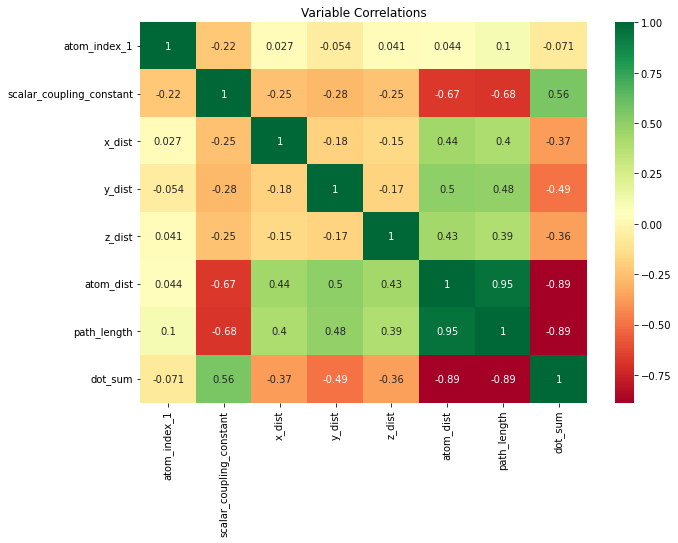

In [ ]:
#Draw correlation matrix 
train_corr = train_path.copy()
corrmat = train_corr.corr()
top_corr_features = corrmat.index[abs(corrmat['scalar_coupling_constant']) >= 0.1]

plt.figure(figsize=(10,7))
sns.heatmap(train_corr[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('Variable Correlations')
plt.show()

In [ ]:
# пока дропнем столбец с названием молекулы, тк 85008 уникальных текстовых значений.
train_path.drop(['molecule_name'], axis=1, inplace=True)
test_path.drop(['molecule_name'], axis=1, inplace=True)

In [ ]:
# Перенесём целевую переменную в отдельный сет
X = train_path.drop(['scalar_coupling_constant'], axis=1)
Y = train_path[['scalar_coupling_constant']]
print(X.shape, Y.shape)

(4658147, 15) (4658147, 1)


In [ ]:
# Разобьём X на train и validation подвыборки.
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, train_size=0.75, random_state=1337, shuffle=True)

In [ ]:
# по размерам валидационная и тестовая выборки непохожи, пока пофиг
print(X_train.shape, X_eval.shape, Y_train.shape, Y_eval.shape, test_dist.shape)

(3493610, 15) (1164537, 15) (3493610, 1) (1164537, 1) (2505542, 15)


In [ ]:
# cat_features=['atom_index_0', 'atom_index_1', 'type']
# X_train.nunique()

In [ ]:
# Создание пулов выборок
train_pool = catboost.Pool(X_train, label=Y_train, cat_features=cat_features)
eval_pool = catboost.Pool(X_eval, label=Y_eval, cat_features=cat_features)
test_pool = catboost.Pool(test_dist, cat_features=cat_features)

In [ ]:
cbr = catboost.CatBoostRegressor(
                                 metric_period = 100,
                                #  iterations=10000,
                                 random_seed=1337,
                                 task_type='GPU',
                                 use_best_model=True,
                                 loss_function='MAE'
                                 )
cbr.fit(train_pool, eval_set=eval_pool)

0:	learn: 17.4253062	test: 17.4504305	best: 17.4504305 (0)	total: 200ms	remaining: 33m 16s
100:	learn: 3.5523679	test: 3.5623765	best: 3.5623765 (100)	total: 18.1s	remaining: 29m 37s
200:	learn: 2.7879869	test: 2.7988460	best: 2.7988460 (200)	total: 36.6s	remaining: 29m 43s
300:	learn: 2.6927001	test: 2.7037396	best: 2.7037396 (300)	total: 56s	remaining: 30m 4s
400:	learn: 2.6469635	test: 2.6583097	best: 2.6583097 (400)	total: 1m 15s	remaining: 30m 11s
500:	learn: 2.6130624	test: 2.6246682	best: 2.6246682 (500)	total: 1m 35s	remaining: 30m 19s
600:	learn: 2.5847087	test: 2.5964248	best: 2.5964248 (600)	total: 1m 55s	remaining: 30m 1s
700:	learn: 2.5618312	test: 2.5736617	best: 2.5736617 (700)	total: 2m 14s	remaining: 29m 43s
800:	learn: 2.5434988	test: 2.5554407	best: 2.5554407 (800)	total: 2m 33s	remaining: 29m 22s
900:	learn: 2.5253468	test: 2.5372925	best: 2.5372925 (900)	total: 2m 52s	remaining: 29m 1s
1000:	learn: 2.5113871	test: 2.5235664	best: 2.5235664 (1000)	total: 3m 11s	rema

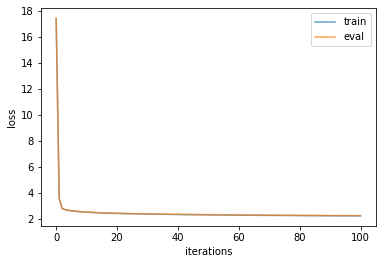

In [ ]:
# Отрисуем графики обучения
hist = cbr.get_evals_result()
plt.plot(list(hist['learn'].values())[0], label= 'train', alpha=0.7)
plt.plot(list(hist['validation'].values())[0], label = 'eval', alpha=0.7)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [ ]:
# Предсказываем значения по тестовой выборке.
Y_test = cbr.predict(test_pool)

In [ ]:
df_submission = df_test.drop(['molecule_name',	'atom_index_0',	'atom_index_1',	'type'], axis=1)
df_submission['scalar_coupling_constant'] = Y_test
df_submission

,scalar_coupling_constant
id,
4658147,0.862447
4658148,4.948457
4658149,-0.400328
4658150,89.262087
4658151,-0.462772
...,...
7163684,1.707770
7163685,4.190703
7163686,4.842920


In [ ]:
# Добиваем сабмита до требуемого размера. (первая попытка решить проблему загрузки задания на Kagle)
# need_rows = 2505542
# while len(df_submission) < need_rows:
#   df_submission.loc[df_submission.index.max()+1] = 0
# print(len(df_submission))

In [ ]:
df_submission.to_csv('submission.csv')

In [ ]:
# сабмитим результат
!kaggle competitions submit -c champs-scalar-coupling -f submission.csv -m "catboost with mae"

100% 64.0M/64.0M [00:01<00:00, 59.3MB/s]
Successfully submitted to Predicting Molecular Properties